<h1 style="text-align:center; font-size: 50px; font-family: 'Arial', sans-serif; font-weight: bold; color: #3498db;">
  Spending Pattern analysis
</h1>

# 1. Improting Necessary librarires

In [31]:
import numpy as np
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/retail-transactional-dataset/retail_data.csv


In [32]:
df = pd.read_csv('/kaggle/input/retail-transactional-dataset/retail_data.csv')

In [33]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


# 2. Data Preprocessing

## 2.1 Handling Missing values

**Before removing missing values**

In [34]:
print(df.isna().sum())
print(f'Total dataset shape: {df.shape}')

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64
Total dataset shape: (302010, 30)


The dataset have plenty of missing value of about 300 average on each column that have missing value. We could impute these values but since we have a large dataset of around 30k rows removing 300 wouldn't take a toll on our outcome.

In [35]:
# Removing all null values from the dataset
df.dropna(inplace = True)

**Before removing missing values**

In [36]:
print(df.isna().sum())
print(f'Total dataset shape: {df.shape}')

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64
Total dataset shape: (293911, 30)


## 2.2 Removing unnecessary features

In [37]:
df.drop(['Transaction_ID', 'Customer_ID' ,'Name','Email','Phone','City','Zipcode','Address','Year','Month'], axis = 1, inplace = True)

In [38]:
df.columns

Index(['State', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment',
       'Date', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount',
       'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
       'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings',
       'products'],
      dtype='object')

In [39]:
df['Product_Brand'].unique()

array(['Nike', 'Samsung', 'Penguin Books', 'Home Depot', 'Nestle',
       'Apple', 'Zara', 'Random House', 'Coca-Cola', 'Adidas', 'Pepsi',
       'IKEA', 'HarperCollins', 'Bed Bath & Beyond', 'Sony', 'Whirepool',
       'Mitsubhisi', 'BlueStar'], dtype=object)

# 3. Exploratory Data Analysis (EDA)

## 3.1 Top Categories

<Axes: ylabel='Product_Brand'>

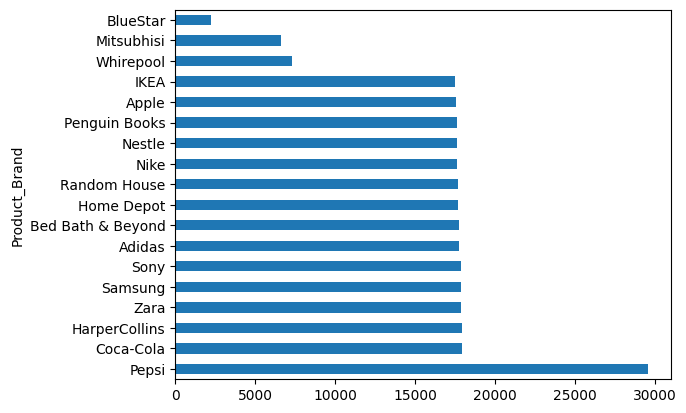

In [40]:
df['Product_Brand'].value_counts().plot(kind='barh')

According to our dataset Pepsi (Brand) has the highest purchase rate in the store by all customers in the store followed by Coca-cola respectively. Beverage are at high demand in the store


## 3.2 Top Products by brand

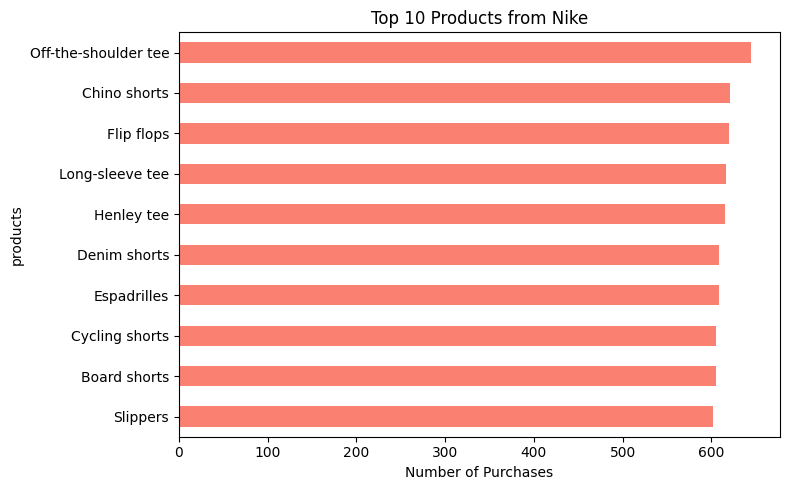

In [41]:
brand_name = 'Nike' 
count = 10
brand_specific = df[df['Product_Brand'] == brand_name]

most_common_product = brand_specific['products'].value_counts().head(count)

# print(f'Top {count} Products purchased from {brand_name}')
# print(most_common_product)

most_common_product.plot(kind='barh', color='salmon', figsize=(8, 5))
plt.xlabel('Number of Purchases')
plt.title(f'Top {count} Products from {brand_name}')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

Above are the top 10 products that are sold from the brand Nike on the store. With off-the-shoulder tee being on top hinting high female customer base for Nike. (Similar insights can be genrerated by changing the variable 'brand_name' and 'count')

## 3.3 Top Sales by country/states (Choropleth Map)

In [42]:
fig = px.choropleth(df.groupby('Country')['Amount'].sum().reset_index(),
                    locations='Country',
                    locationmode='country names',
                    color='Amount',
                    color_continuous_scale='Blues',
                    title='Total Purchase by Country')
fig.show()

In [43]:
df_grouped = df.groupby('Country')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
# formatting the total amount by country in readable format
df_grouped['Amount'] = df_grouped['Amount'].apply(lambda x: f"{x:,.0f}")
df_grouped

,Country,Amount
4,USA,"23,678,547"
3,UK,"15,691,098"
2,Germany,"13,115,732"
0,Australia,"11,263,615"
1,Canada,"11,243,372"


The retail store seems to have international audience being UK with 15 million in sales on the second place followed by Germany and Australia and Canada respectively showing strong international audience worldwide


In [44]:
df

,State,Country,Age,Gender,Income,Customer_Segment,Date,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,Berlin,Germany,21.0,Male,Low,Regular,9/18/2023,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,England,UK,19.0,Female,Low,Premium,12/31/2023,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,New South Wales,Australia,48.0,Male,Low,Regular,4/26/2023,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,Ontario,Canada,56.0,Male,High,Premium,05-08-23,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,England,UK,22.0,Male,Low,Premium,01-10-24,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,New South Wales,Australia,31.0,Male,Medium,Regular,1/20/2024,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,Berlin,Germany,35.0,Female,Low,New,12/28/2023,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,England,UK,41.0,Male,Low,Premium,2/27/2024,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,Ontario,Canada,41.0,Male,Medium,New,09-03-23,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand
